In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.ar_model import AR
import datetime
from scipy.optimize import minimize
import seaborn as sns
sns.set()
import warnings

%matplotlib inline

In [2]:
df = pd.read_excel('Rebellion_Research_Technical_Assessment.xlsx', sheet_name = 'FX_Prices',header = 1)

In [3]:
df.head()

,Dates,EURUSD,Unnamed: 2,Dates.1,GBPUSD,Unnamed: 5,Dates.2,JPYUSD,Unnamed: 8,Dates.3,AUDUSD,Unnamed: 11,Dates.4,CADUSD,Unnamed: 14,Dates.5,NOKUSD,Unnamed: 17,Dates.6,CHFUSD
0,2019-03-29,1.1254,NaN,2019-03-29,1.3182,NaN,2019-03-29,0.009077,NaN,2019-03-29,0.7090,NaN,2019-03-29,0.7456,NaN,2019-03-29,0.1159,NaN,2019-03-29,1.0050
1,2019-02-28,1.1371,NaN,2019-02-28,1.3263,NaN,2019-02-28,0.008978,NaN,2019-02-28,0.7094,NaN,2019-02-28,0.7589,NaN,2019-02-28,0.1168,NaN,2019-02-28,1.0020
2,2019-01-31,1.1448,NaN,2019-01-31,1.3109,NaN,2019-01-31,0.009186,NaN,2019-01-31,0.7273,NaN,2019-01-31,0.7619,NaN,2019-01-31,0.1186,NaN,2019-01-31,1.0057
3,2018-12-31,1.1467,NaN,2018-12-31,1.2754,NaN,2018-12-31,0.009123,NaN,2018-12-31,0.7049,NaN,2018-12-31,0.7332,NaN,2018-12-31,0.1157,NaN,2018-12-31,1.0187
4,2018-11-30,1.1317,NaN,2018-11-30,1.2749,NaN,2018-11-30,0.008812,NaN,2018-11-30,0.7306,NaN,2018-11-30,0.7523,NaN,2018-11-30,0.1163,NaN,2018-11-30,1.0015


In [4]:
df.index = df.Dates

In [5]:
#cols = list(df.columns)
currency_col = ['EURUSD','GBPUSD','JPYUSD','AUDUSD','CADUSD','NOKUSD','CHFUSD']

In [6]:
df = df[currency_col]

In [7]:
df = df.iloc[-1::-1]

In [8]:
df = df.pct_change().dropna()

In [9]:
df.head()

,EURUSD,GBPUSD,JPYUSD,AUDUSD,CADUSD,NOKUSD,CHFUSD
Dates,,,,,,,
1994-05-31,0.005828,-0.004742,-0.029391,0.030189,-0.000830,0.003584,0.000702
1994-06-30,0.027626,0.021836,0.064334,-0.011667,-0.000138,0.031429,0.051753
1994-07-29,0.001879,-0.000194,-0.017031,0.015100,-0.001800,0.002770,-0.004801
1994-08-31,0.006525,-0.006477,0.001002,0.004598,0.013729,-0.004144,0.006030
1994-09-30,0.017827,0.028357,0.009105,-0.003634,0.018605,0.022191,0.034497


In [10]:
#find signs at each return
def find_sign(x):
    if x >= 0:
        return 1
    elif x < 0:
        return -1
df_sign = df.applymap(find_sign)
df_sign.columns = [i+'_sign' for i in df_sign.columns]
df = df.join(df_sign)


In [11]:
X = df.iloc[44:67].EURUSD.values
y = df.iloc[45:68].EURUSD.values
def AIC(mse, k, n):
    return (1 * k + n* np.log(mse/n))
# df.iloc[45:68].EURUSD

In [12]:
# def find_ar1_lm(df, currency):
#     X = df.iloc[44:67][currency].values
#     y = df.iloc[45:68][currency].values    
#     lm = LinearRegression(fit_intercept = False)
#     lm.fit(X.reshape(-1,1),y)
#     return lm

# for i in currency_col:
#     ar_model = find_ar1_lm(df, i)
#     ar_mse = mean_squared_error(y,ar_model.predict(X.reshape(-1,1)))
#     print(i + ':%f'%(AIC(ar_mse, 1, 23)))

In [13]:

# function to return a MA model at time t = 0
def find_ar1(df, currency):
    X = df.iloc[44:68][currency].values
    ar_model = AR(X)
    model = ar_model.fit(1)
    return model

# all AIC values of MA model at time t = 0 for each currency
for i in currency_col:
    ar_model = find_ar1(df, i)
    ar_mse = mean_squared_error(y,ar_model.predict(start = 1, end = 23))
    print('AR(1) '+ i + ':%f'%(AIC(ar_mse, 1, 23)))

AR(1) EURUSD:-243.707417
AR(1) GBPUSD:-239.172615
AR(1) JPYUSD:-237.272985
AR(1) AUDUSD:-243.866736
AR(1) CADUSD:-244.056613
AR(1) NOKUSD:-242.450591
AR(1) CHFUSD:-243.879412


In [14]:
# function to return a MA model at time t = 0
# def find_ma1(df, currency):
#     X = df.iloc[44:68][currency].values
#     ma_model = ARMA(X,order = (0,1))
#     model = ma_model.fit()
#     return model

# # all AIC values of MA model at time t = 0 for each currency
# for i in currency_col:
#     ma_model = find_ma1(df, i)
#     ma_mse = mean_squared_error(y,ma_model.predict(start = 1, end = 23))
#     print('MA(1) '+i + ':%f'%(AIC(ma_mse, 1, 23)))

    
    
#function to determine if a MA(1) or an AR(1) model has a better AIC at time t, 
#and then returns a predicted value or sign at t+1 using model with the lower AIC
def return_t_price(df, currency, t, sign = False):
    X = df.iloc[43+t:67+t][currency].values
    y = df.iloc[44+t:67+t][currency].values
    ma_model = ARMA(X ,order = (0,1))
    ma_model = ma_model.fit()
    ar_model = AR(X)
    ar_model = ar_model.fit(1)
    ar_mse = mean_squared_error(y, ar_model.predict(start = 1, end = 23))
    ma_mse = mean_squared_error(y, ma_model.predict(start = 1, end = 23))
    
    
    if AIC(ar_mse,1,23) < AIC(ma_mse,1,23):
        final_model = ar_model
    elif AIC(ma_mse,1,23) < AIC(ar_mse,1,23):
        final_model = ma_model
        
    if sign == True:
        return find_sign(final_model.predict(start = 23, end = 24)[1])
    else:
        return final_model.predict(start = 23, end = 24)[1]

    

#return all predictions from 2001-01-31 all the way to present choosing the model with lower AIC
def find_all_predictions(df, currency, sign = False):
    a = []
    for i in range(1,232):
        a.append(return_t_price(df, currency, i, sign))
    return a

#find_all_predictions(df, 'GBPUSD', True)

# returns a dataframe with all predicted values for each currency with lower AIC model at each step
def find_predict_df(df,currency_col,sign):
    index = df.iloc[68:].index
    predict_df = pd.DataFrame(index = index)
    for i in currency_col:
        predict_df = predict_df.join(pd.DataFrame(find_all_predictions(df, i, sign), columns = [i+ '_predict']
                                     ,index = index))
    return predict_df


warnings.filterwarnings("ignore", message="Maximum Likelihood optimization failed to converge.")
warnings.filterwarnings("ignore", message="Inverting hessian failed, no bse or cov_params available")
warnings.filterwarnings("ignore", message="overflow encountered in exp")
warnings.filterwarnings("ignore", message="invalid value encountered in true_divide")

df_predict = find_predict_df(df, currency_col, True)

In [15]:
df_predict.head()

,EURUSD_predict,GBPUSD_predict,JPYUSD_predict,AUDUSD_predict,CADUSD_predict,NOKUSD_predict,CHFUSD_predict
Dates,,,,,,,
2000-01-31,-1,-1,1,-1,-1,1,-1
2000-02-29,-1,-1,1,-1,-1,1,-1
2000-03-31,-1,1,1,-1,-1,1,-1
2000-04-28,-1,-1,-1,-1,-1,-1,-1
2000-05-31,-1,1,1,-1,1,1,-1


In [16]:
TOLERANCE = 1e-10


def _allocation_risk(weights, covariances):

    # We calculate the risk of the weights distribution
    portfolio_risk = np.sqrt((weights * covariances * weights.T))[0, 0]

    # It returns the risk of the weights distribution
    return portfolio_risk


def _assets_risk_contribution_to_allocation_risk(weights, covariances):

    # We calculate the risk of the weights distribution
    portfolio_risk = _allocation_risk(weights, covariances)

    # We calculate the contribution of each asset to the risk of the weights
    # distribution
    assets_risk_contribution = np.multiply(weights.T, covariances * weights.T) \
        / portfolio_risk

    # It returns the contribution of each asset to the risk of the weights
    # distribution
    return assets_risk_contribution


def _risk_budget_objective_error(weights, args):

    # The covariance matrix occupies the first position in the variable
    covariances = args[0]

    # The desired contribution of each asset to the portfolio risk occupies the
    # second position
    assets_risk_budget = args[1]

    # We convert the weights to a matrix
    weights = np.matrix(weights)

    # We calculate the risk of the weights distribution
    portfolio_risk = _allocation_risk(weights, covariances)

    # We calculate the contribution of each asset to the risk of the weights
    # distribution
    assets_risk_contribution = \
        _assets_risk_contribution_to_allocation_risk(weights, covariances)

    # We calculate the desired contribution of each asset to the risk of the
    # weights distribution
    assets_risk_target = \
        np.asmatrix(np.multiply(portfolio_risk, assets_risk_budget))

    # Error between the desired contribution and the calculated contribution of
    # each asset
    error = \
        sum(np.square(assets_risk_contribution - assets_risk_target.T))[0, 0]

    # It returns the calculated error
    return error


def _get_risk_parity_weights(covariances, assets_risk_budget, initial_weights):

    # Restrictions to consider in the optimisation: only long positions whose
    # sum equals 100%
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1.0},
                   {'type': 'ineq', 'fun': lambda x: x})

    # Optimisation process in scipy
    optimize_result = minimize(fun=_risk_budget_objective_error,
                               x0=initial_weights,
                               args=[covariances, assets_risk_budget],
                               method='SLSQP',
                               constraints=constraints,
                               tol=TOLERANCE,
                               options={'disp': False})

    # Recover the weights from the optimised object
    weights = optimize_result.x

    # It returns the optimised weights
    return weights

In [17]:

# returns a cov_matrix of past60 months given a time step t, 
# and all negative of original returns are converted to + 
def find_past60_cov_matrix(df,t):
    return df.iloc[7+t:67+t][currency_col].applymap(np.absolute).cov().values
    

#find the weight* at a given t
def find_weight_star_t(cov, t):
    weight = _get_risk_parity_weights(cov, np.ones(7)/7, np.ones(7)/7)
    diag = cov.diagonal()
    return (.05/np.sqrt(np.dot(weight.T, np.dot(cov, weight))) * weight) 
    
#find weight* for all t steps
def find_all_weight_star(df):
    a = []
    for i in range(1,232):
        a.append(find_weight_star_t(find_past60_cov_matrix(df,i),i))
    return a

weight_star = find_all_weight_star(df)    

In [44]:
# find the final test return using weights and predicted directional movements
def test_return(df_predict, df, weight):
    return (df.iloc[68:][currency_col].values * df_predict.values * weight).sum(1)


final_returns = test_return(df_predict, df, weight_star)

pct = 1+final_returns

In [51]:
(pct[0:190]).prod()

2.922752884560937

In [46]:
trend = []
for i in range(len(pct)):
    trend.append(pct[0:i+1].prod())


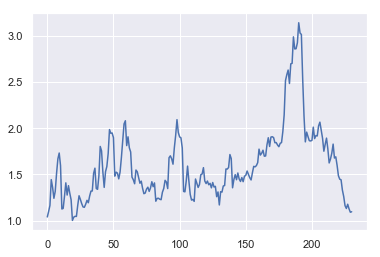

In [53]:
plt.plot(trend)